In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as s 
import statsmodels.formula.api as sm
from scipy import stats
from statsmodels.formula.api import ols
from sklearn import linear_model

## Problem - 1

In [4]:
file1 = pd.read_excel('C:/Users/Pankaj Aggarwal/Desktop/Data/Filtration ex.xlsx')
file1.head()

,service call,months since last service,type of repair,repair time in hrs
0,1,2,electrical,2.9
1,2,6,mechanical,3.0
2,3,8,electrical,4.8
3,4,3,mechanical,1.8
4,5,2,electrical,2.9


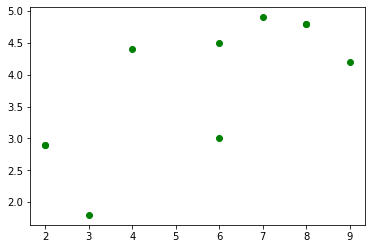

In [6]:
x1= file1['months since last service']
y= file1['repair time in hrs']
x2 = file1['type of repair']
plt.scatter(x1, y, color='g')

In [19]:
x1 = s.add_constant(x1)
model1 = s.OLS(y,x1).fit()
model1.summary()           # simple linear regression for x1, y

C:\Users\Pankaj Aggarwal\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     repair time in hrs   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     9.174
Date:                Tue, 22 Sep 2020   Prob (F-statistic):             0.0163
Time:                        21:27:21   Log-Likelihood:                -10.602
No. Observations:                  10   AIC:                             25.20
Df Residuals:                       8   BIC:                             25.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         2.1473      0.605      3.549      0.008       0.752       3.542
months since last service     0.3041      0.100      3.029      0.016       0.073       0.536
==============================================================================
Omnibus:                        0.907   Durbin-Watson:                   2.154
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.751
Skew:                          -0.501   Prob(JB):                        0.687
Kurtosis:                       2.107   Cond. No.                         15.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
influence = model1.get_influence()
res = influence.resid_studentized_external
res

array([ 0.20780383, -1.38929534,  0.29660358, -2.19705171,  0.20780383,
        0.84428063, -1.05697834,  0.29660358,  1.54792567,  0.69040331])

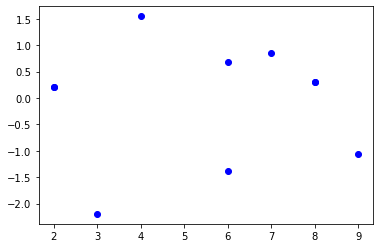

In [21]:
plt.scatter(file1['months since last service'], res, color = 'b') 
# for x1 alone 95% of errors are between -2,2

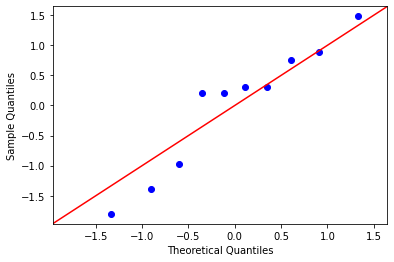

In [22]:
resid = model1.resid  # for residuals
plot_prob = s.ProbPlot(resid, stats.norm, fit = True)    # alot of points are away from 45 deg line
fig = plot_prob.qqplot(line='45')

# since most of the points are away from 45 deg line that means theres some other variable affecting the dependent variable

In [23]:
dummy1 = pd.get_dummies(file1['type of repair'])
dummy1   # 1 = presence of electrical prob, 0 = absence of electrical prob

,electrical,mechanical
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
5,1,0
6,0,1
7,0,1
8,1,0
9,1,0


In [24]:
dummy2 = pd.concat([file1, dummy1], axis = 1)
dummy2.drop(['type of repair', 'mechanical'],inplace = True, axis=1)
dummy2

,service call,months since last service,repair time in hrs,electrical
0,1,2,2.9,1
1,2,6,3.0,0
2,3,8,4.8,1
3,4,3,1.8,0
4,5,2,2.9,1
5,6,7,4.9,1
6,7,9,4.2,0
7,8,8,4.8,0
8,9,4,4.4,1
9,10,6,4.5,1


In [40]:
model2 = s.OLS(dummy2['repair time in hrs'], s.add_constant(dummy2[['months since last service', 'electrical']])).fit()
model2.summary()  # categorical regression including continuous, categorical data

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     repair time in hrs   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     21.36
Date:                Tue, 22 Sep 2020   Prob (F-statistic):            0.00105
Time:                        21:38:40   Log-Likelihood:                -4.6200
No. Observations:                  10   AIC:                             15.24
Df Residuals:                       7   BIC:                             16.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.9305      0.467      1.993      0.087      -0.174       2.035
months since last service     0.3876      0.063      6.195      0.000       0.240       0.536
electrical                    1.2627      0.314      4.020      0.005       0.520       2.005
==============================================================================
Omnibus:                        3.357   Durbin-Watson:                   1.136
Prob(Omnibus):                  0.187   Jarque-Bera (JB):                1.663
Skew:                           0.994   Prob(JB):                        0.435
Kurtosis:                       2.795   Cond. No.                         22.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
## Conclusion - Repair time for electrical problem requires avg of 1.2627 hrs more than mechanical problems

 ## Problem - 2

In [9]:
salary = pd.read_excel('C:/Users/Pankaj Aggarwal/Desktop/Data/salary.xlsx')
salary.head()

,employee,salary,gender,experience
0,1,7.5,m,6
1,2,8.6,m,10
2,3,9.1,m,12
3,4,10.3,m,18
4,5,13.0,m,30


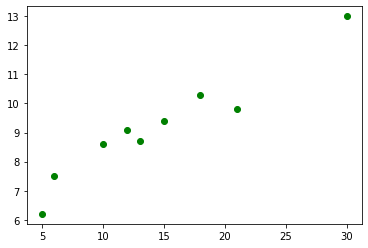

In [10]:
plt.scatter(salary['experience'], salary['salary'], color='g')

In [11]:
a = s.add_constant(salary['experience'])
model = s.OLS(salary['salary'], a).fit()
model.summary()    # normal Linear Regression

C:\Users\Pankaj Aggarwal\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     87.61
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           3.30e-05
Time:                        15:15:16   Log-Likelihood:                -6.2491
No. Observations:                   9   AIC:                             16.50
Df Residuals:                       7   BIC:                             16.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8093      0.404     14.386      0.000       4.854       6.764
experience     0.2332      0.025      9.360      0.000       0.174       0.292
==============================================================================
Omnibus:                        2.443   Durbin-Watson:                   1.171
Prob(Omnibus):                  0.295   Jarque-Bera (JB):                1.432
Skew:                          -0.918   Prob(JB):                        0.489
Kurtosis:                       2.331   Cond. No.                         35.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

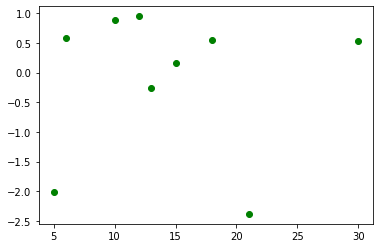

In [12]:
influence = model.get_influence()
std_res = influence.resid_studentized_external
plt.scatter(salary['experience'], std_res, color = 'g')

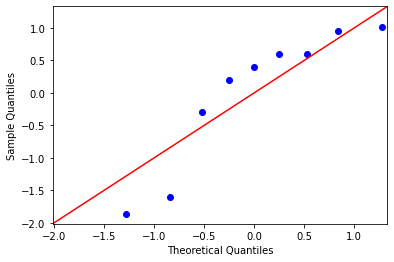

In [13]:
res = model.resid
plot = s.ProbPlot(res, stats.norm, fit= True)
fig = plot.qqplot(line= '45')
# since most of the points are away from 45 deg line that means theres some other variable affecting the dependent variable

In [14]:
d = pd.get_dummies(salary['gender'])
d

,f,m
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,1,0
6,1,0
7,1,0
8,1,0


In [15]:
d1 = pd.concat([salary, d],axis=1)
d1.drop(['gender', 'm'],inplace= True, axis=1)
d1

,employee,salary,experience,f
0,1,7.5,6,0
1,2,8.6,10,0
2,3,9.1,12,0
3,4,10.3,18,0
4,5,13.0,30,0
5,6,6.2,5,1
6,7,8.7,13,1
7,8,9.4,15,1
8,9,9.8,21,1


In [16]:
model = s.OLS(d1['salary'], s.add_constant(d1['f'])).fit()
model.summary()  # this shows that on the basis of gender alone theres no discrimation in salary at pop level but at sample
# level theres discrimination. Females are getting mean lesser salary 1.1750 since there negative sign. After including exp
# check the difference.

C:\Users\Pankaj Aggarwal\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.8426
Date:                Thu, 12 Nov 2020   Prob (F-statistic):              0.389
Time:                        15:15:21   Log-Likelihood:                -17.455
No. Observations:                   9   AIC:                             38.91
Df Residuals:                       7   BIC:                             39.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7000      0.853     11.367      0.000       7.682      11.718
f             -1.1750      1.280     -0.918      0.389      -4.202       1.852
==============================================================================
Omnibus:                        0.387   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.280
Skew:                           0.330   Prob(JB):                        0.869
Kurtosis:                       2.441   Cond. No.                         2.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
model = s.OLS(d1['salary'], s.add_constant(d1[['experience', 'f']])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     111.6
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           1.80e-05
Time:                        15:15:22   Log-Likelihood:                -1.5752
No. Observations:                   9   AIC:                             9.150
Df Residuals:                       6   BIC:                             9.742
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2485      0.291     21.439      0.000       5.535       6.962
experience     0.2271      0.016     14.089      0.000       0.188       0.267
f             -0.7890      0.238     -3.309      0.016      -1.372      -0.206
==============================================================================
Omnibus:                        0.110   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.947   Jarque-Bera (JB):                0.198
Skew:                           0.174   Prob(JB):                        0.906
Kurtosis:                       2.363   Cond. No.                         44.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

what if we drop f column instead of m i.e 0 = female, 1= male. Will not effect anything

In [18]:
d2 = pd.concat([salary, d],axis=1)
d2.drop(['gender', 'f'],inplace= True, axis=1)
d2

,employee,salary,experience,m
0,1,7.5,6,1
1,2,8.6,10,1
2,3,9.1,12,1
3,4,10.3,18,1
4,5,13.0,30,1
5,6,6.2,5,0
6,7,8.7,13,0
7,8,9.4,15,0
8,9,9.8,21,0


In [19]:
model = s.OLS(d2['salary'], s.add_constant(d2[['experience', 'm']])).fit()
model.summary()

C:\Users\Pankaj Aggarwal\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     111.6
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           1.80e-05
Time:                        15:15:38   Log-Likelihood:                -1.5752
No. Observations:                   9   AIC:                             9.150
Df Residuals:                       6   BIC:                             9.742
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4595      0.280     19.486      0.000       4.774       6.145
experience     0.2271      0.016     14.089      0.000       0.188       0.267
m              0.7890      0.238      3.309      0.016       0.206       1.372
==============================================================================
Omnibus:                        0.110   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.947   Jarque-Bera (JB):                0.198
Skew:                           0.174   Prob(JB):                        0.906
Kurtosis:                       2.363   Cond. No.                         42.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Conclusion - Female are getting mean lesser salary by 0.7890 Lakhs with same experience at population level